# PCA - Principal component analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wine=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')

In [3]:
wine

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Pre- Processing

In [4]:
y=wine['Wine']
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

In [5]:
# Features
X=wine.drop(['Wine'],axis=1)
X

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
X.shape

(178, 13)

## Standardization

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## Construction of covariance marix

In [8]:
cm=np.cov(X_scaled.T)
cm

array([[ 1.00564972,  0.09493026,  0.21273976, -0.31198788,  0.27232816,
         0.29073446,  0.23815287, -0.15681042,  0.13747022,  0.549451  ,
        -0.07215255,  0.07275191,  0.64735687],
       [ 0.09493026,  1.00564972,  0.16497228,  0.29013035, -0.05488343,
        -0.3370606 , -0.41332866,  0.29463237, -0.22199334,  0.25039204,
        -0.56446685, -0.37079354, -0.19309537],
       [ 0.21273976,  0.16497228,  1.00564972,  0.44587209,  0.28820583,
         0.12970824,  0.11572743,  0.1872826 ,  0.00970647,  0.2603499 ,
        -0.07508874,  0.00393333,  0.22488969],
       [-0.31198788,  0.29013035,  0.44587209,  1.00564972, -0.0838039 ,
        -0.32292752, -0.353355  ,  0.36396647, -0.19844168,  0.01883781,
        -0.27550299, -0.27833221, -0.44308618],
       [ 0.27232816, -0.05488343,  0.28820583, -0.0838039 ,  1.00564972,
         0.21561254,  0.19688989, -0.25774204,  0.23777643,  0.20107967,
         0.05571118,  0.06637684,  0.39557317],
       [ 0.29073446, -0.337060

In [9]:
cm.shape

(13, 13)

## Finding eigen value, eigen vector

In [10]:
eig_val,eig_vec=np.linalg.eig(cm)
eig_val

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.10396199, 0.35046627, 0.16972374,
       0.29051203, 0.22706428, 0.25232001])

In [11]:
eig_vec

array([[-0.1443294 ,  0.48365155, -0.20738262,  0.0178563 , -0.26566365,
         0.21353865,  0.05639636, -0.01496997,  0.39613926, -0.26628645,
        -0.50861912, -0.22591696,  0.21160473],
       [ 0.24518758,  0.22493093,  0.08901289, -0.53689028,  0.03521363,
         0.53681385, -0.42052391, -0.02596375,  0.06582674,  0.12169604,
         0.07528304,  0.07648554, -0.30907994],
       [ 0.00205106,  0.31606881,  0.6262239 ,  0.21417556, -0.14302547,
         0.15447466,  0.14917061,  0.14121803, -0.17026002, -0.04962237,
         0.30769445, -0.49869142, -0.02712539],
       [ 0.23932041, -0.0105905 ,  0.61208035, -0.06085941,  0.06610294,
        -0.10082451,  0.28696914, -0.09168285,  0.42797018, -0.05574287,
        -0.20044931,  0.47931378,  0.05279942],
       [-0.14199204,  0.299634  ,  0.13075693,  0.35179658,  0.72704851,
         0.03814394, -0.3228833 , -0.05677422, -0.15636143,  0.06222011,
        -0.27140257,  0.07128891,  0.06787022],
       [-0.39466085,  0.065039

## Sorting eigen values

In [12]:
sorted_eig_val=[i for i in sorted(eig_val, reverse=True)]
sorted_eig_val

[4.732436977583594,
 2.5110809296451237,
 1.4542418678464675,
 0.924165866824875,
 0.8580486765371124,
 0.645282212467854,
 0.5541414662457846,
 0.35046627494625404,
 0.2905120326939765,
 0.2523200103608247,
 0.227064281730885,
 0.16972373898012105,
 0.10396199182075289]

## Choosing the dimension =2

In [14]:
tot=sum(sorted_eig_val)
tot

13.073446327683627

In [15]:
exp_var=[(i/tot) for i in sorted_eig_val]
exp_var

[0.3619884809992634,
 0.19207490257008925,
 0.1112363053624998,
 0.07069030182714034,
 0.06563293679648607,
 0.04935823319222561,
 0.042386793226233274,
 0.02680748948378864,
 0.022221534047897062,
 0.019300190939440767,
 0.01736835689989914,
 0.012982325756042093,
 0.007952148898994487]

In [16]:
cum_exp_var=np.cumsum(exp_var)
cum_exp_var

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

## Plotting

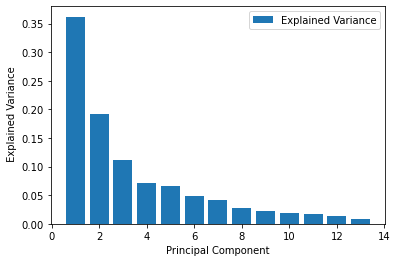

In [22]:
plt.bar(range(1,14), exp_var,label='Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel(' Explained Variance')
plt.legend();

## Construction of projection matrix

In [23]:
eigen_pair=[(np.abs(eig_val[i]),eig_vec[:,i]) for i in range(len(eig_val))]
eigen_pair

[(4.732436977583594,
  array([-0.1443294 ,  0.24518758,  0.00205106,  0.23932041, -0.14199204,
         -0.39466085, -0.4229343 ,  0.2985331 , -0.31342949,  0.0886167 ,
         -0.29671456, -0.37616741, -0.28675223])),
 (2.5110809296451237,
  array([ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
          0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
         -0.27923515, -0.16449619,  0.36490283])),
 (1.4542418678464675,
  array([-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
          0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
          0.08522192,  0.16600459, -0.12674592])),
 (0.924165866824875,
  array([ 0.0178563 , -0.53689028,  0.21417556, -0.06085941,  0.35179658,
         -0.19806835, -0.15229479,  0.20330102, -0.39905653, -0.06592568,
          0.42777141, -0.18412074,  0.23207086])),
 (0.8580486765371124,
  array([-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
         -0.14931841, 

In [24]:
# Taking only 2 dimension

w=np.hstack((eigen_pair[0][1][:,np.newaxis],
            eigen_pair[1][1][:,np.newaxis]))

In [25]:
w

array([[-0.1443294 ,  0.48365155],
       [ 0.24518758,  0.22493093],
       [ 0.00205106,  0.31606881],
       [ 0.23932041, -0.0105905 ],
       [-0.14199204,  0.299634  ],
       [-0.39466085,  0.06503951],
       [-0.4229343 , -0.00335981],
       [ 0.2985331 ,  0.02877949],
       [-0.31342949,  0.03930172],
       [ 0.0886167 ,  0.52999567],
       [-0.29671456, -0.27923515],
       [-0.37616741, -0.16449619],
       [-0.28675223,  0.36490283]])

In [26]:
w.shape

(13, 2)

## Transforming 13 dim data to 2 dim

In [27]:
X_scaled.shape

(178, 13)

In [30]:
w.shape

(13, 2)

In [31]:
new_X=X_scaled.dot(w)
new_X

array([[-3.31675081,  1.44346263],
       [-2.20946492, -0.33339289],
       [-2.51674015,  1.0311513 ],
       [-3.75706561,  2.75637191],
       [-1.00890849,  0.86983082],
       [-3.05025392,  2.12240111],
       [-2.44908967,  1.17485013],
       [-2.05943687,  1.60896307],
       [-2.5108743 ,  0.91807096],
       [-2.75362819,  0.78943767],
       [-3.47973668,  1.30233324],
       [-1.7547529 ,  0.61197723],
       [-2.11346234,  0.67570634],
       [-3.45815682,  1.13062988],
       [-4.31278391,  2.09597558],
       [-2.3051882 ,  1.66255173],
       [-2.17195527,  2.32730534],
       [-1.89897118,  1.63136888],
       [-3.54198508,  2.51834367],
       [-2.0845222 ,  1.06113799],
       [-3.12440254,  0.78689711],
       [-1.08657007,  0.24174355],
       [-2.53522408, -0.09184062],
       [-1.64498834, -0.51627893],
       [-1.76157587, -0.31714893],
       [-0.9900791 ,  0.94066734],
       [-1.77527763,  0.68617513],
       [-1.23542396, -0.08980704],
       [-2.18840633,

In [32]:
new_X.shape

(178, 2)

## Visualising the projected data

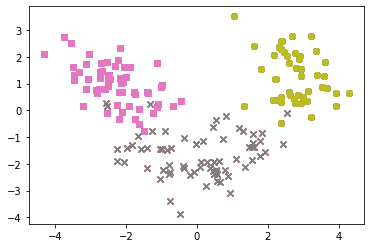

In [33]:
for l in np.unique(y):
    plt.scatter(new_X[y==1,0], new_X[y==1,1],marker='s')
    plt.scatter(new_X[y==2,0], new_X[y==2,1],marker='x')
    plt.scatter(new_X[y==3,0], new_X[y==3,1],marker='o')

## Using Sklearn

In [34]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
X_pca=pca.fit_transform(X_scaled)

In [35]:
pca.components_.T[:,1]

array([-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
       -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
        0.27923515,  0.16449619, -0.36490283])

In [36]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019])

# LDA - Linear Discriminant Analysis

## Building the LDA model

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [39]:
y.unique()

array([1, 2, 3], dtype=int64)

In [40]:
# n_components <= min(n_classes-1, n_features)
#              <= min(3-1, 13)
#               = 2, the dim of the hyperplane onto which we want to project

lda=LinearDiscriminantAnalysis(n_components=2)

## Transformation of the data

In machine learning, data transformation refers to the process of converting raw data into a format that can be easily understood and used by a machine learning algorithm.

Data transformation can involve several techniques, such as scaling, normalization, encoding, feature selection, feature engineering, and more. The goal of these techniques is to extract the most useful information from the data and make it easier for the machine learning model to learn patterns and relationships in the data

In [41]:
X_lda=lda.fit_transform(X_scaled,y)

In [42]:
X_lda

array([[ 4.70024401,  1.97913835],
       [ 4.30195811,  1.17041286],
       [ 3.42071952,  1.42910139],
       [ 4.20575366,  4.00287148],
       [ 1.50998168,  0.4512239 ],
       [ 4.51868934,  3.21313756],
       [ 4.52737794,  3.26912179],
       [ 4.14834781,  3.10411765],
       [ 3.86082876,  1.95338263],
       [ 3.36662444,  1.67864327],
       [ 4.80587907,  2.23536271],
       [ 3.42807646,  2.17510939],
       [ 3.66610246,  2.26248961],
       [ 5.58824635,  2.05478773],
       [ 5.50131449,  3.61304865],
       [ 3.18475189,  2.88952528],
       [ 3.28936988,  2.76584266],
       [ 2.99809262,  1.42511132],
       [ 5.24640372,  3.70982655],
       [ 3.13653106,  1.97689922],
       [ 3.57747791,  0.5624599 ],
       [ 1.69077135,  0.91342136],
       [ 4.83515033,  0.9147628 ],
       [ 3.09588961,  0.61735888],
       [ 3.32164716,  0.29847734],
       [ 2.14482223,  0.16369247],
       [ 3.9824285 ,  2.17515679],
       [ 2.68591432,  1.21850924],
       [ 3.56309464,

## Visualisation of the transformed data

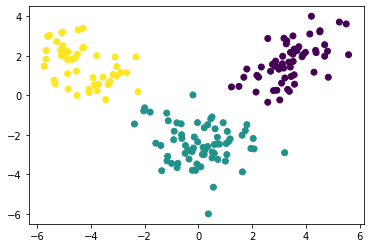

In [43]:
plt.scatter(X_lda[:,0],X_lda[:,1],c=y);

## Locally Linear Embedding

Locally Linear Embedding (LLE) is a technique used for dimensionality reduction and data visualization. The basic idea of LLE is to find a lower-dimensional representation of high-dimensional data while preserving the local structure of the data.

LLE works by assuming that the high-dimensional data lies on or near a low-dimensional manifold, which is a curved surface embedded in the high-dimensional space. LLE then seeks to find a set of weights that can be used to linearly combine the neighboring points of each data point to approximate it. In other words, it tries to find a linear representation of each data point using its nearest neighbors.

The LLE algorithm involves two main steps. In the first step, LLE constructs a graph of the data by connecting each point to its k-nearest neighbors. In the second step, LLE finds a set of weights for each point that minimizes the reconstruction error, which is the difference between the original data point and its linear reconstruction from its neighbors.

The resulting lower-dimensional representation of the data is obtained by minimizing the sum of squared errors of the weights for all data points. The algorithm returns a set of low-dimensional coordinates that preserve the local relationships between the data points.

LLE has been used in a variety of applications, including image processing, computer vision, and bioinformatics. It is particularly useful for visualizing high-dimensional data and identifying clusters or patterns in the data.

In [44]:
from sklearn.datasets import make_swiss_roll

In [45]:
X,y=make_swiss_roll(n_samples=1000, random_state=100)
X

array([[-9.02243256,  0.58237783, -3.91158679],
       [ 3.63249892,  8.02698255,  6.37347947],
       [-6.59990375, 20.01826915,  5.68894892],
       ...,
       [ 6.06643253, 20.59885419, -0.90994904],
       [ 1.72607563,  7.66075992, -4.75699209],
       [-6.24197451, 16.34985863, -8.25349579]])

In [46]:
y

array([ 9.8338599 ,  7.33595863,  8.71337301, 12.67421645,  4.75686315,
        5.85815095, 11.03405017, 12.49586783,  6.00081823, 10.13251592,
       13.11290049,  6.68407253,  6.4590663 ,  5.73381711,  6.78298907,
       13.93570086, 12.36232244,  6.33289485, 12.405126  ,  7.29547319,
        8.78110506, 13.57196131, 12.41855283,  7.88016948,  6.36559356,
        8.22624823,  4.7660019 ,  7.09145131, 12.21133145,  4.8561637 ,
       10.35635484, 10.40311269,  5.70338257,  8.31212114,  5.05616771,
       13.10432026, 13.95735025,  5.27732892, 13.10558677, 10.14955752,
       11.71009519, 10.65173266, 10.19612245,  4.90502326,  6.69184284,
        9.84592302, 11.96112869,  7.07513585,  7.40689238, 12.74602342,
       13.90160869, 13.0519348 ,  8.10067058, 10.35650158,  8.05625884,
        7.91860622,  6.39076277,  6.95260412,  5.13520603,  9.47596798,
        8.25848482, 10.29944826, 10.64945129,  6.05636528, 13.51363588,
       13.63180922, 10.38890125,  8.36700007,  8.13535528,  6.63

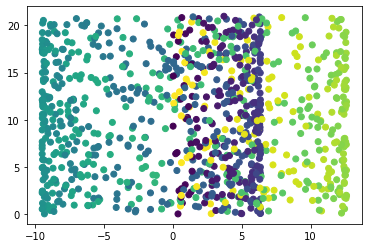

In [47]:
plt.scatter(X[:,0],X[:,1],c=y);

## Building the model

In [48]:
from sklearn.manifold import LocallyLinearEmbedding

In [49]:
lle=LocallyLinearEmbedding(n_neighbors=10,n_components=2)

## Transforming the data

In [51]:
X_lle=lle.fit_transform(X)
X_lle

array([[ 0.00034989, -0.05151431],
       [-0.02608578, -0.0101984 ],
       [-0.01085655,  0.00063941],
       ...,
       [-0.03429485,  0.06341982],
       [-0.04373722,  0.03412421],
       [ 0.00769698, -0.01832971]])

## Visualisation

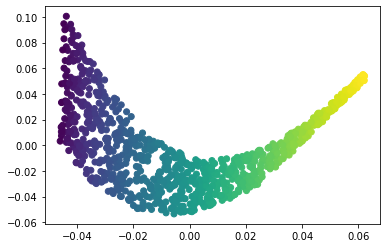

In [52]:
plt.scatter(X_lle[:,0],X_lle[:,1],c=y);

# TSNE (T-distributed stochastic neighbor embedding)

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

## Accessing the Dataset

In [54]:
X,y=fetch_openml('mnist_784',version=1,return_X_y=True)

when we run the code, it downloads the MNIST dataset version 1 from the OpenML repository and assigns the input features to X and the corresponding labels to y. We can then use these arrays to train and evaluate machine learning models for tasks such as image classification.

In [55]:
X.shape

(70000, 784)

In [56]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [58]:
y.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

In [59]:
X.iloc[1]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 1, Length: 784, dtype: float64

## Plotting the images

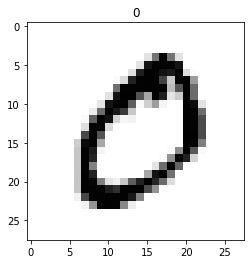

In [60]:
plt.imshow(X.iloc[1].to_numpy().reshape(28,28),'Greys')
plt.title(y[1]);

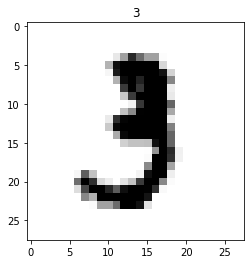

In [61]:
plt.imshow(X.iloc[10].to_numpy().reshape(28,28),'Greys')
plt.title(y[10]);

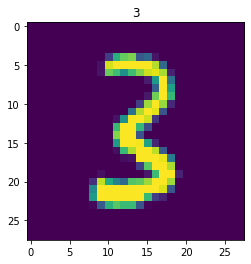

In [68]:
plt.imshow(X.iloc[50000].to_numpy().reshape(28,28),'viridis')
plt.title(y[50000]);

## Creating a random sample of 1K for 70K

In [63]:
np.random.seed(100)
sample=np.random.choice(X.shape[0],1000)
print(sample)

[38408 56088 65615 63370 14260 20533 13890 49954 59243 17724  7738 42491
 38537  6230 30596 27039 21377 35981  6901 54995 10843 44463 21243 52560
 49154 66425 35294 26003 12571 61240 23790 62833 20382 68528 11567 32423
   806 10412 18624 23480 53685  1738 40977   488 19803 31195 30675 47950
 48128 30156 36995  1667 25812 57738 46295 28150 53743 32700 52073 46256
 46891  6182  5290  6239 14650 14438 63894  7424 42679 41186  4914 63907
 29079 32265 36336 50965 24985 52662 34469 62650 18142  5939  2626  4535
 34905   429 66576 11730 14957 24556 44255 41748 39050 38302 67468 19445
 66909 23415   556 58425  6527 25344  9960 35804 30530 16016 42373 49498
 50014 69844 30579 65684 36376 18874 45852 56018 44679 10815 56450 46295
 28817 11994 25053 26698 28085 34590 68675 42890 49805 60277 17039 39525
 14374 14196 32855 63485 33274 61612  4095  8336 40755  6327    83 34346
 39672 35574 22309  1648 11984 19774 12131 29137 17478 62434 30432 12207
 60297 23407 53028  7881 39539 44414 51524 67283 64

## Creating a new set of 1000

In [66]:
X1=X.iloc[sample,:]
X1.shape

(1000, 784)

In [67]:
X1.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
38408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
y1=y[sample]

In [70]:
y1.shape

(1000,)

In [71]:
y1.head()

38408    5
56088    2
65615    2
63370    4
14260    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

## Building the model

In [72]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,perplexity=30)

In [73]:
X_tsne=tsne.fit_transform(X1)
X_tsne.shape

C:\Users\guruc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\guruc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1000, 2)

In [74]:
X_tsne[0]

array([22.939573, 13.993068], dtype=float32)

## Visualisation of the transformed points

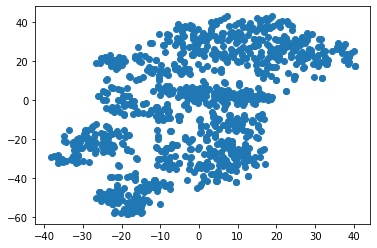

In [75]:
plt.scatter(X_tsne[:,0],X_tsne[:,1]);

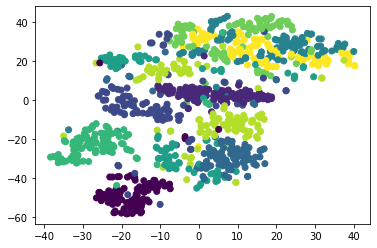

In [76]:
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y1.astype(float));

## Creating a DF for better visualisation

In [77]:
X_df=pd.DataFrame({'X0':X_tsne[:,0],
                  'X1':X_tsne[:,1],
                  'Label':y1})
X_df

,X0,X1,Label
38408,22.939573,13.993068,5
56088,-13.561443,-1.145843,2
65615,-9.424026,-8.405927,2
63370,34.267212,25.340717,4
14260,29.056919,34.054592,4
...,...,...,...
43545,-24.426233,-17.090849,6
6051,1.756038,30.691936,9
22851,-29.010527,-18.734632,6
65851,20.353048,20.824131,4


<Figure size 1080x864 with 0 Axes>

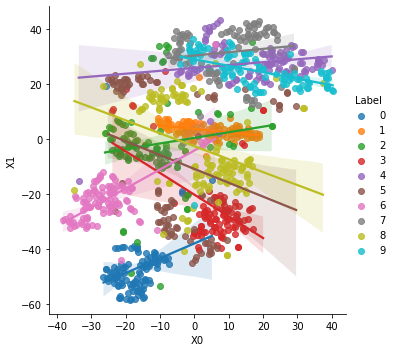

In [78]:
plt.figure(figsize=(15,12))
sns.lmplot(data=X_df,x='X0',y='X1',hue='Label');

<Figure size 1080x864 with 0 Axes>

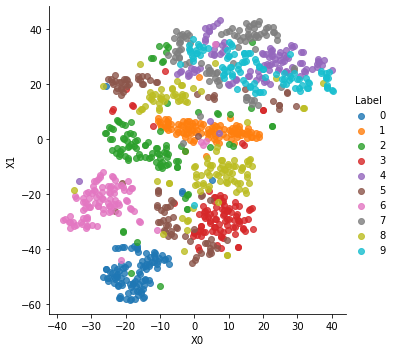

In [79]:
plt.figure(figsize=(15,12))
sns.lmplot(data=X_df,x='X0',y='X1',
           hue='Label',fit_reg=False);

## Hierarchical Clustering

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Accessing the dataset

In [81]:
cust=pd.read_csv('wholesale_customers.csv')

In [82]:
cust

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [83]:
cust.shape

(440, 8)

## Standardisation of features

In [84]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(cust)
X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [85]:
# Converting into DF

X=pd.DataFrame(X,columns=cust.columns)
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


## Drawing Dendrogram

In [86]:
import scipy.cluster.hierarchy as sch

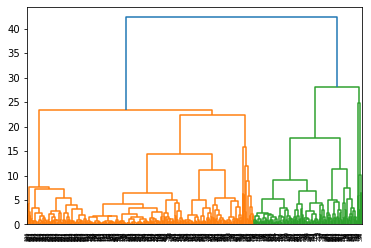

In [87]:
dendro=sch.dendrogram(sch.linkage(X,method='ward'))

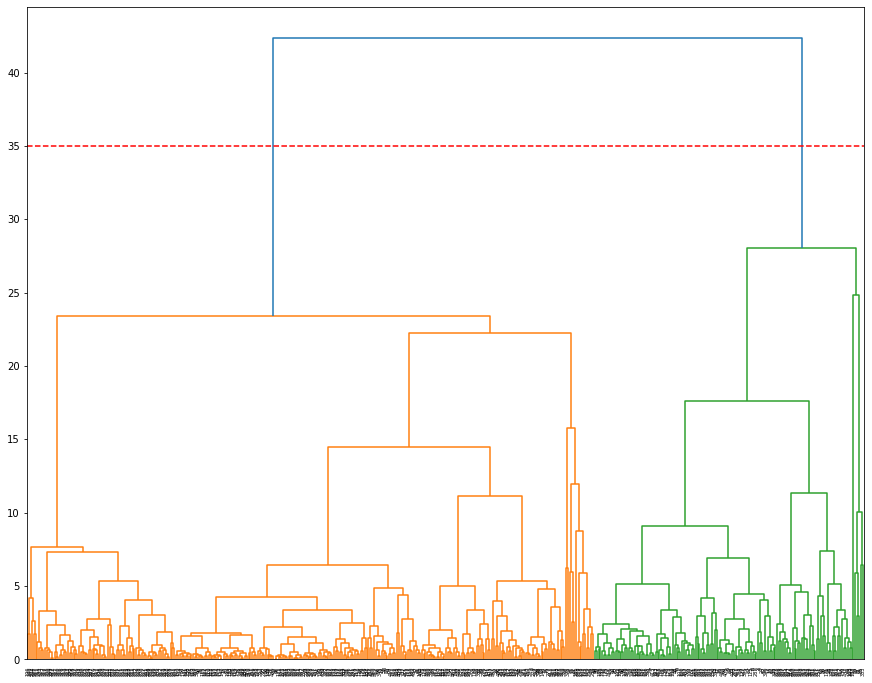

In [88]:
plt.figure(figsize=(15,12))
dendro=sch.dendrogram(sch.linkage(X,method='ward'))
plt.axhline(y=35,color='red',linestyle='--');

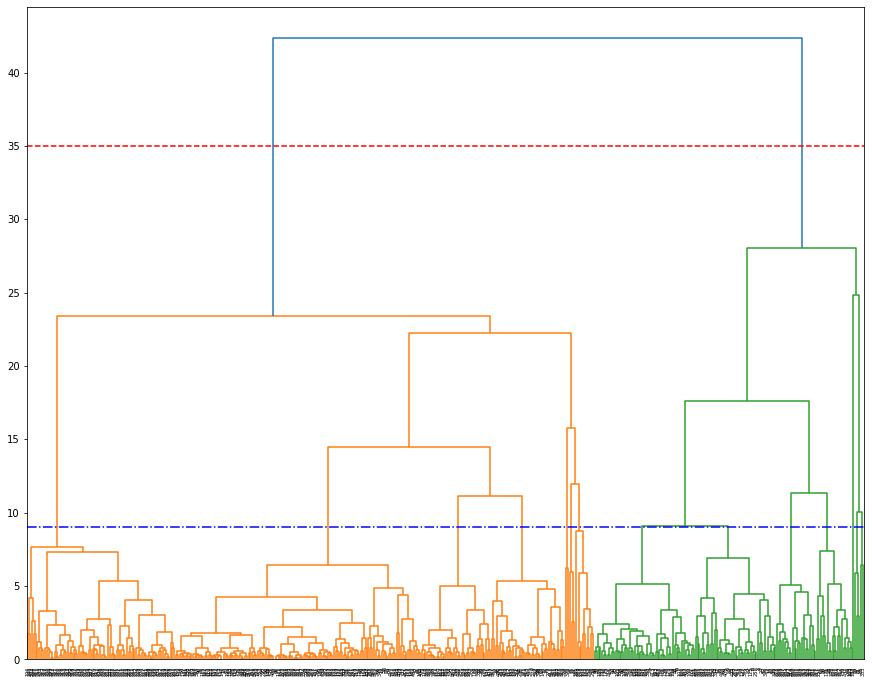

In [89]:
plt.figure(figsize=(15,12))
dendro=sch.dendrogram(sch.linkage(X,method='ward'))
plt.axhline(y=35,color='red',linestyle='--');
plt.axhline(y=9,color='blue',linestyle='-.');

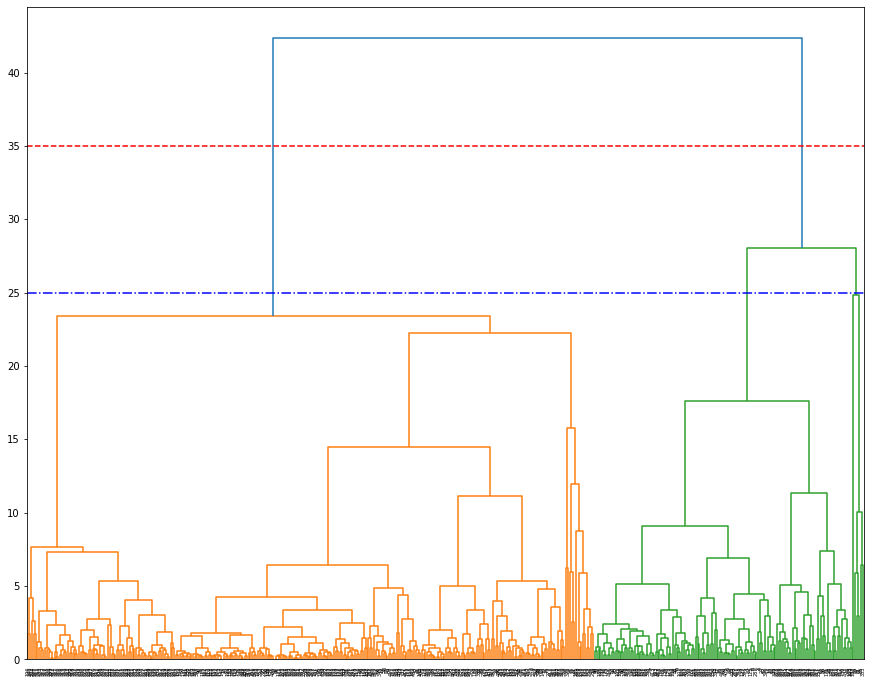

In [90]:
plt.figure(figsize=(15,12))
dendro=sch.dendrogram(sch.linkage(X,method='ward'))
plt.axhline(y=35,color='red',linestyle='--');
plt.axhline(y=25,color='blue',linestyle='-.');

## Agglomerative Clustering using Sklearn

Agglomerative clustering is a hierarchical clustering technique that builds a tree-like hierarchy of clusters by iteratively merging the most similar clusters until all the data points belong to a single cluster. Sklearn provides an implementation of agglomerative clustering through the AgglomerativeClustering class in the sklearn.cluster module

In [91]:
from sklearn.cluster import AgglomerativeClustering

clust=AgglomerativeClustering(n_clusters=2,linkage='ward')

In [92]:
type(clust)

sklearn.cluster._agglomerative.AgglomerativeClustering

In [93]:
clust.fit_predict(X)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [94]:
clust.labels_

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

## Adding labels to the DF

In [95]:
X['Label']=pd.Series(clust.labels_)

In [96]:
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0
...,...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,1
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,1
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,0
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,1


## Analysing the customer segments

In [97]:
# No of customers in each segment

X['Label'].value_counts()

1    298
0    142
Name: Label, dtype: int64

In [98]:
# Listing all custmers belong to the segment '0'
X[X['Label']==0]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0
5,1.448652,0.590668,-0.204806,0.334067,-0.297637,-0.496155,-0.228138,-0.026224,0
...,...,...,...,...,...,...,...,...,...
418,1.448652,0.590668,-0.897676,0.365944,1.124138,-0.606071,0.810196,-0.265849,0
421,1.448652,0.590668,0.400754,-0.128767,0.116064,-0.420884,0.112024,0.091991,0
423,1.448652,0.590668,0.440491,-0.286255,-0.347045,-0.415110,-0.226458,-0.304189,0
424,1.448652,0.590668,0.394184,-0.395045,0.450965,-0.453261,0.069609,-0.452934,0


In [99]:
X[X['Label']==1]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
8,-0.690297,0.590668,-0.477901,-0.291409,-0.185336,-0.545854,-0.244726,-0.275079,1
15,-0.690297,0.590668,-0.138313,-0.635143,-0.435116,-0.551629,-0.402629,-0.395069,1
17,-0.690297,0.590668,-0.484788,0.048933,-0.528665,-0.460479,-0.527355,1.048362,1
19,-0.690297,0.590668,-0.334071,-0.447812,0.159362,-0.495536,-0.076325,-0.363474,1
...,...,...,...,...,...,...,...,...,...
434,-0.690297,0.590668,0.374473,-0.254242,0.004501,-0.491618,-0.107192,-0.243839,1
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,1
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,1
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,1


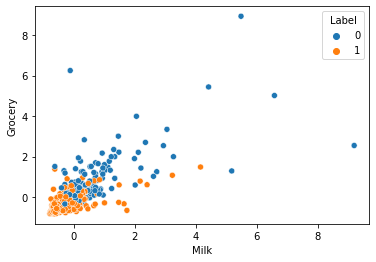

In [100]:
# Buying pattern of Milk and Grocery

sns.scatterplot(x=X['Milk'],y=X['Grocery'],hue=X['Label']);

<Figure size 1080x864 with 0 Axes>

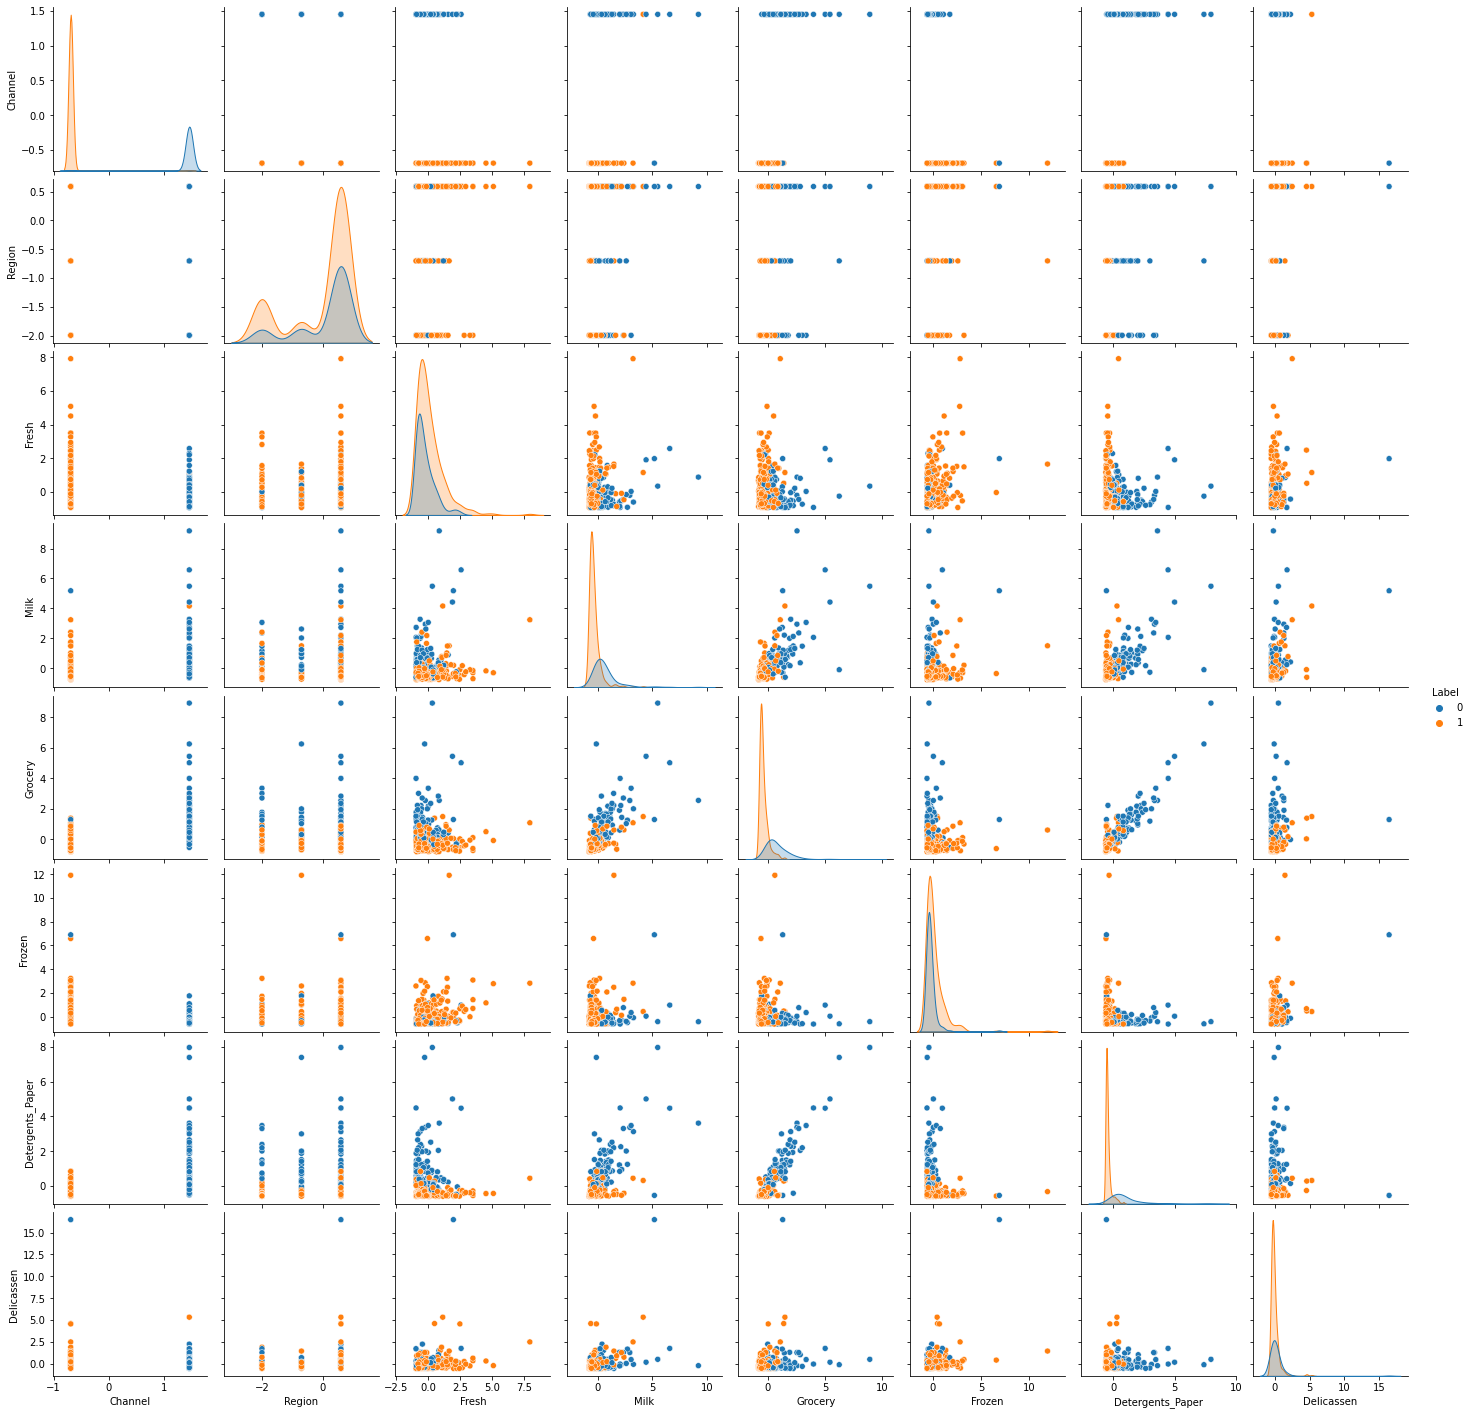

In [101]:
plt.figure(figsize=(15,12))
sns.pairplot(data=X,hue='Label');

## Clustering using Gaussian Mixturre Models

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\guruc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


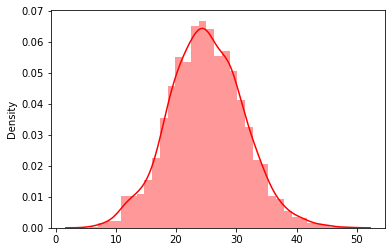

In [103]:
# Creating samples
np.random.seed(100)

X1=np.random.normal(loc=25,scale=6,size=2000)
sns.distplot(X1,color='red',kde=True);

C:\Users\guruc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


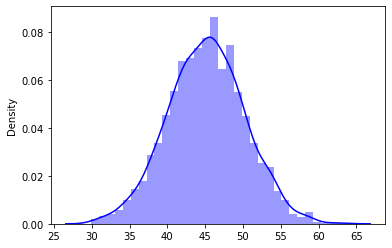

In [104]:
X2=np.random.normal(loc=45,scale=5,size=2000)
sns.distplot(X2,color='blue',kde=True);

C:\Users\guruc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


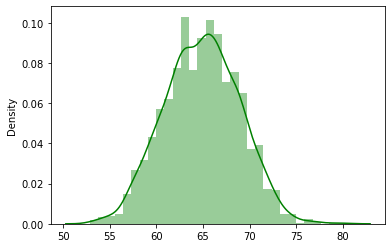

In [105]:
X3=np.random.normal(loc=65,scale=4,size=2000)
sns.distplot(X3,color='green',kde=True);

C:\Users\guruc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


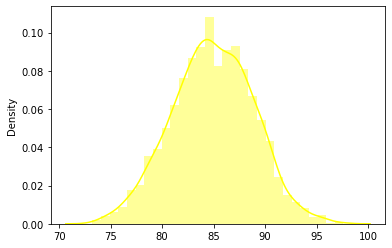

In [106]:
X4=np.random.normal(loc=85,scale=4,size=2000)
sns.distplot(X4,color='yellow',kde=True);

In [107]:
 ## Merging
    
X=np.hstack((X1,X2,X3,X4))
X

array([14.50140716, 27.05608242, 31.91821482, ..., 78.21331852,
       87.58552884, 86.39771956])

C:\Users\guruc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


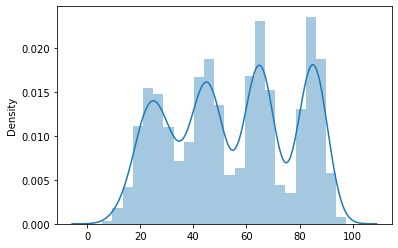

In [108]:
sns.distplot(X,kde=True);

C:\Users\guruc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


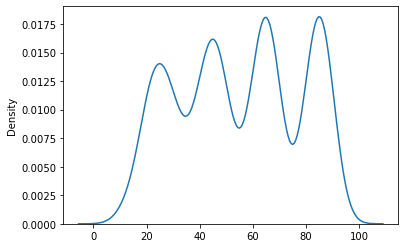

In [109]:
sns.distplot(X,kde=True,hist=False);

## Building a GMM model with 4 clusters

In [110]:
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=4,n_init=10)

In [111]:
# Training
gmm.fit(X.reshape(-1,1))

GaussianMixture(n_components=4, n_init=10)

In [112]:
# Prediction
pred=gmm.predict(X.reshape(-1,1))
pred

array([2, 2, 2, ..., 0, 0, 0], dtype=int64)

In [113]:
np.unique(pred)

array([0, 1, 2, 3], dtype=int64)

In [114]:
gmm.means_

array([[84.93534966],
       [44.98261885],
       [24.76545994],
       [64.81489035]])

In [115]:
gmm.covariances_

array([[[15.4517251 ]],

       [[25.17577479]],

       [[35.10589593]],

       [[17.03908132]]])

In [116]:
np.bincount(pred)

array([1996, 2012, 1969, 2023], dtype=int64)

In [117]:
gmm.weights_

array([0.24932829, 0.25099078, 0.24647361, 0.25320731])

## Finding no of clusters

In [129]:
n_components=np.arange(2,11)
aic_scores=[]
bic_scores=[]
for n in n_components:
    model=GaussianMixture(n,n_init=10)
    model.fit(X.reshape(-1,1))
    aic_score=model.aic(X.reshape(-1,1))
    bic_score=model.bic(X.reshape(-1,1))
    aic_scores.append(aic_score)
    bic_scores.append(bic_score)

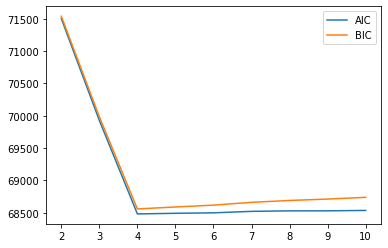

In [130]:
plt.plot(n_components,aic_scores,label='AIC')
plt.plot(n_components,bic_scores,label='BIC')
plt.legend();

#### No of clusters=4

In [131]:
# Generating samples

gmm.sample(100000)

(array([[84.52886133],
        [84.76602864],
        [89.86406708],
        ...,
        [61.35689655],
        [65.01695122],
        [65.72905513]]),
 array([0, 0, 0, ..., 3, 3, 3]))

## Building GMM for the dataset

In [151]:
import pandas as pd
import numpy as np

# generate random weight and height data
np.random.seed(123)
weight = np.random.normal(70, 10, 500)
height = np.random.normal(170, 15, 500)

# create dataframe
data = pd.DataFrame({'Weight': weight, 'Height': height})

print(df.head())

      Weight      Height
0  59.143694  181.280505
1  79.973454  171.044611
2  72.829785  166.018316
3  54.937053  183.943767
4  64.213997  188.912319


In [152]:
data

,Weight,Height
0,59.143694,181.280505
1,79.973454,171.044611
2,72.829785,166.018316
3,54.937053,183.943767
4,64.213997,188.912319
...,...,...
495,75.678801,179.521447
496,75.129828,186.048779
497,69.730774,156.360095
498,73.115815,177.053956


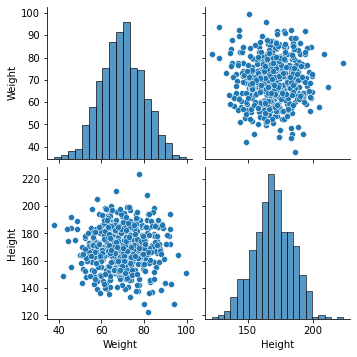

In [153]:
sns.pairplot(data);

## Finding no of clusters

In [154]:
n_components=np.arange(2,11)
aic_scores=[]
bic_scores=[]
for n in n_components:
    model=GaussianMixture(n,n_init=10)
    model.fit(data)
    aic_score=model.aic(data)
    bic_score=model.bic(data)
    aic_scores.append(aic_score)
    bic_scores.append(bic_score)

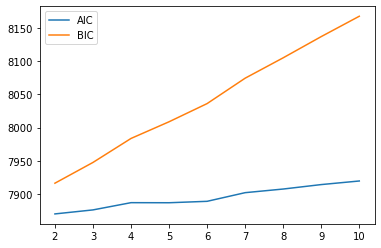

In [155]:
plt.plot(n_components,aic_scores,label='AIC')
plt.plot(n_components,bic_scores,label='BIC')
plt.legend();

## Number of clusters = 4

In [156]:
# Model building

gmm_data=GaussianMixture(n_components=4,n_init=10)
gmm_data.fit(data)

GaussianMixture(n_components=4, n_init=10)

In [157]:
data_pred=gmm_data.predict(data)
data_pred

array([0, 2, 2, 0, 3, 3, 1, 0, 1, 0, 0, 2, 3, 0, 1, 3, 2, 2, 2, 2, 1, 2,
       0, 2, 0, 0, 3, 1, 3, 0, 3, 1, 0, 0, 3, 3, 3, 2, 0, 3, 1, 1, 0, 3,
       2, 3, 1, 1, 2, 3, 0, 0, 2, 1, 3, 2, 3, 2, 3, 2, 0, 2, 1, 0, 3, 3,
       1, 3, 0, 3, 2, 0, 3, 0, 0, 3, 0, 2, 3, 0, 2, 1, 3, 2, 0, 0, 0, 1,
       2, 3, 3, 0, 2, 3, 0, 2, 0, 1, 3, 1, 3, 1, 2, 2, 3, 2, 3, 1, 2, 0,
       0, 3, 0, 1, 2, 2, 0, 3, 2, 0, 0, 3, 3, 2, 2, 1, 2, 2, 2, 3, 0, 0,
       1, 3, 1, 2, 3, 1, 2, 3, 3, 1, 2, 3, 2, 0, 2, 2, 0, 3, 3, 1, 0, 0,
       0, 2, 2, 0, 1, 2, 1, 3, 2, 2, 2, 0, 2, 3, 3, 3, 0, 1, 3, 2, 2, 2,
       1, 3, 3, 2, 3, 2, 2, 0, 0, 0, 0, 3, 0, 2, 1, 2, 2, 2, 1, 0, 3, 2,
       3, 3, 2, 1, 3, 2, 2, 3, 3, 0, 3, 3, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2,
       0, 0, 3, 1, 2, 3, 0, 0, 0, 2, 0, 3, 0, 2, 1, 3, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 3, 3, 0, 0, 3, 3, 2, 3, 0, 1, 3, 2, 3, 2, 1, 3, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 3, 0, 2, 1, 0, 0, 1, 0, 3, 0, 0, 1, 1, 3, 0, 1,
       0, 2, 1, 2, 1, 3, 1, 3, 0, 2, 3, 1, 2, 2, 2,

In [158]:
gmm_data.means_

array([[ 62.25302645, 169.0791265 ],
       [ 68.29676433, 149.7645045 ],
       [ 75.66037922, 167.99294959],
       [ 71.23237306, 186.16099495]])

In [159]:
gmm_data.covariances_

array([[[ 59.04693581, -17.86939427],
        [-17.86939427,  76.50901962]],

       [[119.15593178, -30.94249156],
        [-30.94249156,  82.6146411 ]],

       [[ 55.95176456,   8.85678806],
        [  8.85678806,  53.37627577]],

       [[ 79.15967941,  -3.16428877],
        [ -3.16428877,  81.65150626]]])

In [160]:
gmm_data.weights_

array([0.25410429, 0.20040576, 0.28256298, 0.26292697])

## Adding Clsuster labels to DF

In [162]:
data['Label']=data_pred

In [163]:
data

,Weight,Height,Label
0,59.143694,181.280505,0
1,79.973454,171.044611,2
2,72.829785,166.018316,2
3,54.937053,183.943767,0
4,64.213997,188.912319,3
...,...,...,...
495,75.678801,179.521447,3
496,75.129828,186.048779,3
497,69.730774,156.360095,1
498,73.115815,177.053956,2


In [164]:
data['Label'].value_counts()

2    152
0    128
3    123
1     97
Name: Label, dtype: int64

## Visuaise the clusters

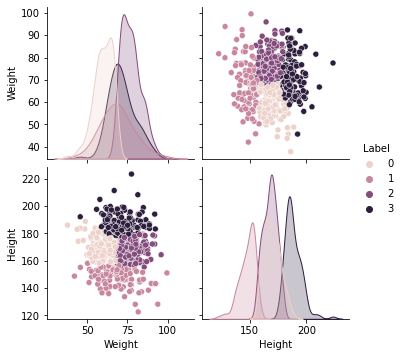

In [165]:
sns.pairplot(data, hue='Label');

## Mall customer segmentation

In [166]:
customer=pd.read_csv('Mall_customers.csv')

In [167]:
customer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Preprocessing

In [168]:
customer=customer.drop(['CustomerID'],axis=1)
customer

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [169]:
# Convereting categorical to numeric

cust=pd.get_dummies(customer)
cust

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [170]:
# Standardisation of features

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X=sc.fit_transform(cust)
X

array([[-1.42456879, -1.73899919, -0.43480148, -1.12815215,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407, -1.12815215,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783,  0.88640526, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992,  0.88640526, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627,  0.88640526, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436,  0.88640526, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767, -1.12815215,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002,  0.88640526, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 , -1.12815215,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216,  0.88640526, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894,  0.88640526, -0.88640526],
       [-1.06573534, -1.54815205,  1.0

In [171]:
# Converting to DF

X=pd.DataFrame(X, columns=cust.columns)
X

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,0.886405,-0.886405
196,0.441365,2.497807,-0.861839,0.886405,-0.886405
197,-0.491602,2.497807,0.923953,-1.128152,1.128152
198,-0.491602,2.917671,-1.250054,-1.128152,1.128152


## Dimnensionality reduction using TSNE

In [172]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2,random_state=100)
type(tsne)

sklearn.manifold._t_sne.TSNE

In [173]:
X_tsne=tsne.fit_transform(X)
X_tsne

C:\Users\guruc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\guruc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[ 13.742989 , -10.150426 ],
       [ 14.02748  ,  -8.550854 ],
       [-10.936391 ,   3.5889792],
       [ -8.2719145,   7.8462076],
       [-11.331948 ,   4.896708 ],
       [ -8.388392 ,   7.9244766],
       [-11.59382  ,   3.1148205],
       [ -7.8547893,   8.482502 ],
       [ 13.784817 , -14.67874  ],
       [ -8.590201 ,   7.4308343],
       [ 13.600574 , -14.865328 ],
       [ -7.3235292,   8.178741 ],
       [-13.269284 ,   1.8991803],
       [ -8.454644 ,   7.977522 ],
       [ 13.482756 , -12.509849 ],
       [ 13.834272 ,  -8.55989  ],
       [-11.744753 ,   4.4423738],
       [ 13.643496 ,  -9.113793 ],
       [ 13.063439 , -13.698295 ],
       [ -7.3385396,   8.1984005],
       [ 13.1889925, -11.681824 ],
       [ 13.421404 ,  -8.824541 ],
       [-12.442577 ,   2.4455643],
       [ 13.333221 ,  -9.116437 ],
       [-13.137483 ,   2.1783068],
       [ 13.420705 ,  -8.440628 ],
       [-13.083287 ,   3.4043512],
       [ 12.964891 ,  -9.925661 ],
       [-12.49134  ,

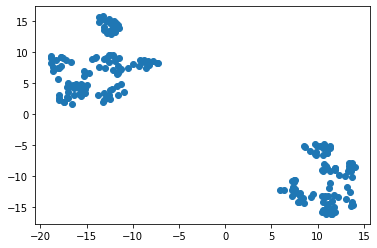

In [174]:
# Visualisation
plt.scatter(X_tsne[:,0],X_tsne[:,1]);

## Findings:

1. Formation of clearly defined clusters.
2. There can be 2 clusters

## Clustering using GMM

In [176]:
from sklearn.mixture import GaussianMixture
n_comps=np.arange(2,20,1)
aic_score=[]
bic_score=[]
for n in n_comps:
    model=GaussianMixture(n_components=n,
                          random_state=10,
                        n_init=5)
    model.fit(X)
    aic_score.append(model.aic(X))
    bic_score.append(model.bic(X))

In [177]:
print(aic_score)

[-2766.4799897414314, -2796.645539935852, -2814.9954736260534, -2827.841837753307, -2858.720591137311, -2860.811115140883, -2847.191390254745, -2843.104277435569, -2824.911193879629, -2833.7984953177297, -2825.7254751146584, -2824.9723143900273, -2809.2809202299327, -2748.2451958535935, -2737.979046967214, -2770.5300715477665, -2765.822614353267, -2736.012872768096]


In [178]:
print(bic_score)

[-2631.2489777129617, -2592.1498632098737, -2541.235132202566, -2484.8168316323113, -2446.430920318807, -2379.2567796248695, -2296.372390041223, -2223.0206125245386, -2135.5628642710894, -2075.1855010116815, -1997.8478161111013, -1927.8299906889615, -1842.873931831358, -1712.57354275751, -1633.0427291736216, -1596.3290890566657, -1522.3569671646574, -1423.2825608819771]


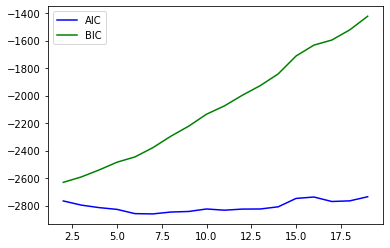

In [179]:
# Plotting
plt.plot(n_comps,aic_score,c='b',label='AIC')
plt.plot(n_comps,bic_score,c='g',label='BIC')
plt.legend();

## Building GM model with 2 clusters

In [180]:
gm=GaussianMixture(n_components=2,random_state=100,n_init=5)

In [181]:
gm.fit(X)

GaussianMixture(n_components=2, n_init=5, random_state=100)

In [182]:
pred=gm.predict(X)
pred

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0], dtype=int64)

In [183]:
gm.means_

array([[ 0.06866767,  0.06363885, -0.0655555 , -1.12815215,  1.12815215],
       [-0.05395317, -0.05000195,  0.05150789,  0.88640526, -0.88640526]])

In [184]:
gm.covariances_

array([[[ 1.22567626e+00, -1.04066272e-01, -3.33359637e-01,
         -1.43429255e-31,  1.43429255e-31],
        [-1.04066272e-01,  1.02207728e+00, -2.57837238e-02,
         -4.66145080e-31,  4.66145080e-31],
        [-3.33359637e-01, -2.57837238e-02,  1.15955344e+00,
          7.17146277e-32, -7.17146277e-32],
        [-1.43429255e-31, -4.66145080e-31,  7.17146277e-32,
          1.00000000e-06, -7.09974815e-30],
        [ 1.43429255e-31,  4.66145080e-31, -7.17146277e-32,
         -7.09974815e-30,  1.00000000e-06]],

       [[ 8.16068940e-01,  5.34957132e-02, -3.16092284e-01,
         -1.40868019e-32,  1.40868019e-32],
        [ 5.34957132e-02,  9.76973092e-01,  4.37956955e-02,
         -7.04340094e-32,  7.04340094e-32],
        [-3.16092284e-01,  4.37956955e-02,  8.68608681e-01,
          2.81736038e-32, -2.81736038e-32],
        [-1.40868019e-32, -7.04340094e-32,  2.81736038e-32,
          1.00000000e-06, -2.41588652e-30],
        [ 1.40868019e-32,  7.04340094e-32, -2.81736038e-32,
  

In [185]:
gm.weights_

array([0.44, 0.56])

## Adding Label column to the DF

In [186]:
customer['Label']=pred

In [187]:
customer

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,1
197,Male,32,126,74,0
198,Male,32,137,18,0


## Insights:

In [188]:
customer['Label'].value_counts()

1    112
0     88
Name: Label, dtype: int64

In [189]:
customer['Label'].value_counts()/sum(customer['Label'].value_counts())

1    0.56
0    0.44
Name: Label, dtype: float64

In [190]:
customer[customer['Gender']=='Male']

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,Male,19,15,39,0
1,Male,21,15,81,0
8,Male,64,19,3,0
10,Male,67,19,14,0
14,Male,37,20,13,0
...,...,...,...,...,...
187,Male,28,101,68,0
192,Male,33,113,8,0
197,Male,32,126,74,0
198,Male,32,137,18,0


In [191]:
customer[customer['Gender']=='Male'][customer['Label']==0]

C:\Users\guruc\AppData\Local\Temp\ipykernel_12512\2853060918.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customer[customer['Gender']=='Male'][customer['Label']==0]


,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,Male,19,15,39,0
1,Male,21,15,81,0
8,Male,64,19,3,0
10,Male,67,19,14,0
14,Male,37,20,13,0
...,...,...,...,...,...
187,Male,28,101,68,0
192,Male,33,113,8,0
197,Male,32,126,74,0
198,Male,32,137,18,0


1. All Males form a market segment, constituting 44% of the customer base.

In [192]:
customer[customer['Gender']=='Female'][customer['Label']==0]

C:\Users\guruc\AppData\Local\Temp\ipykernel_12512\3527605515.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customer[customer['Gender']=='Female'][customer['Label']==0]


,Gender,Age,Annual Income (k$),Spending Score (1-100),Label


In [193]:
customer[customer['Gender']=='Female'][customer['Label']==1]

C:\Users\guruc\AppData\Local\Temp\ipykernel_12512\778459031.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customer[customer['Gender']=='Female'][customer['Label']==1]


,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1
5,Female,22,17,76,1
6,Female,35,18,6,1
...,...,...,...,...,...
191,Female,32,103,69,1
193,Female,38,113,91,1
194,Female,47,120,16,1
195,Female,35,120,79,1


2. All female customers form a segment, constituting 56 % of the customer base.

In [195]:
# Forming samples

gm.sample(10000)

(array([[-1.61277499,  0.10594344,  0.19176884, -1.12794494,  1.12867215],
        [ 0.87398161, -0.01132528, -1.15834383, -1.12878373,  1.12813598],
        [ 0.37907508, -1.02961123, -0.61783964, -1.12785031,  1.12770265],
        ...,
        [-0.72225881,  0.08541431,  0.89346945,  0.88624626, -0.88644512],
        [ 0.22157311, -0.21648202, -1.40252937,  0.88770122, -0.88647536],
        [ 0.44325619,  0.15695807, -0.86917668,  0.88711431, -0.88589413]]),
 array([0, 0, 0, ..., 1, 1, 1]))